In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pyttsx3  # Text-to-speech library

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=0)
mp_drawing = mp.solutions.drawing_utils

# Initialize text-to-speech engine globally
engine = pyttsx3.init()

# Function to give audio feedback
def give_audio_feedback(feedback_list):
    try:
        if feedback_list:
            for feedback in feedback_list:
                engine.say(feedback)
        else:
            engine.say("Great! Your pose looks correct.")
        # Run the engine's loop outside the main processing loop
        engine.runAndWait()
    except RuntimeError:
        pass  # Prevent re-entrant loop error

# Function to extract pose landmarks from an image
def extract_landmarks(image_path, pose_model):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose_model.process(image_rgb)
    if results.pose_landmarks:
        selected_landmarks = [0, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28]
        return np.array([[lm.x, lm.y, lm.z] for i, lm in enumerate(results.pose_landmarks.landmark) if i in selected_landmarks]).flatten()
    else:
        return None

# Function to compute similarity and deviations
def compare_landmarks(predicted_landmarks, reference_landmarks, frame, tolerance=0.25):
    reference_landmarks = reference_landmarks.reshape(-1, 3)
    deviations = np.linalg.norm(predicted_landmarks - reference_landmarks, axis=1)
    feedback = []
    
    for i, deviation in enumerate(deviations):
        if deviation > tolerance:
            feedback.append(f"Keypoint {i} is off by {deviation:.2f} units.")
            cv2.putText(frame, f"Keypoint {i} off", (20, 60 + i * 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)
    
    if not feedback:
        cv2.putText(frame, "Pose is correct!", (10, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
    else:
        cv2.putText(frame, "Adjust your pose!", (10, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    return feedback

# Function to detect pose and landmarks
def detect_pose(frame, pose_model):
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose_model.process(image_rgb)
    if results.pose_landmarks:
        selected_landmarks = [0, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28]
        landmarks = np.array([[lm.x, lm.y, lm.z] for i, lm in enumerate(results.pose_landmarks.landmark) if i in selected_landmarks])
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        return frame, landmarks
    return frame, None

# Load the reference pose landmarks
reference_landmarks = extract_landmarks("C:/Users/91832/pbl/DATASET/TRAIN/tree/00000075.jpg", pose_video)
if reference_landmarks is None:
    print("Error: Could not extract reference landmarks.")
    exit()

# Capture video from the webcam
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 640)  # Width
camera_video.set(4, 480)  # Height

while camera_video.isOpened():
    ok, frame = camera_video.read()
    if not ok:
        print("Failed to capture frame. Exiting...")
        break

    frame = cv2.flip(frame, 1)
    frame, landmarks = detect_pose(frame, pose_video)

    if landmarks is not None:
        feedback = compare_landmarks(landmarks, reference_landmarks, frame, tolerance=0.25)
        give_audio_feedback(feedback)

    cv2.imshow("Yoga Pose Feedback", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC key to exit
        break

camera_video.release()
cv2.destroyAllWindows()


In [9]:
pip install pyttsx3


Note: you may need to restart the kernel to use updated packages.


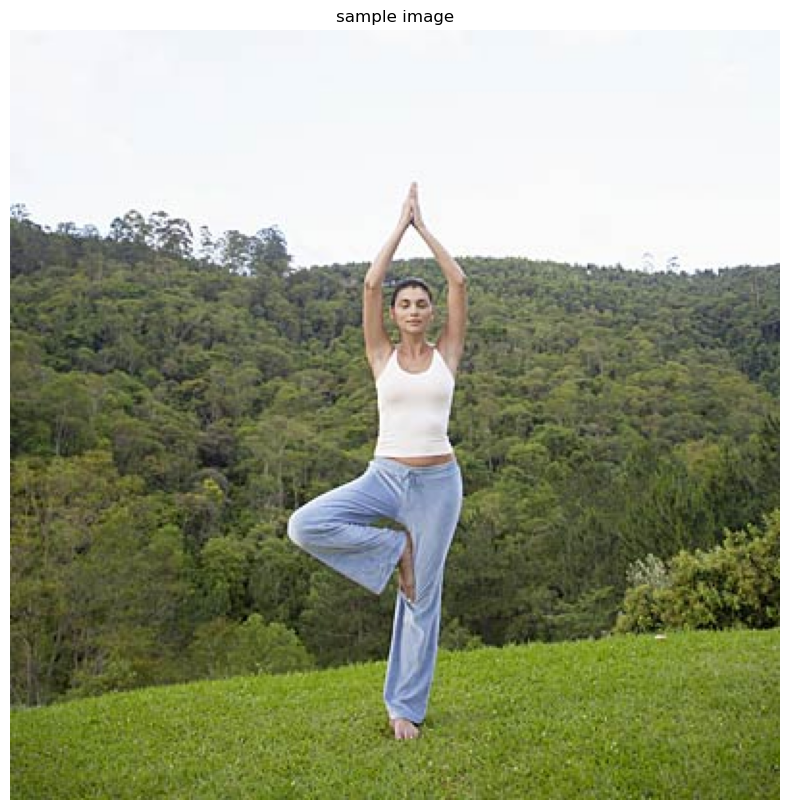

In [8]:
#read image from specified path
import matplotlib.pyplot as plt
sample_img=cv2.imread("C:/Users/91832/pbl/DATASET/TRAIN/tree/00000075.jpg");
# specify a size of the figure
plt.figure(figsize=[10,10])
# Display the sample image, also convert BGR to RGB for display
plt.title('sample image');plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()